In [6]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
# import forestci as fci
# import pickle5 as pickle

In [7]:
path = 'G:/cassidy/MODISLANDSAT_py37/valbiomeDictLAI'
pd.to_pickle(valbiomeDictLAI, path, protocol=4)


In [2]:
# calbiomeDictLAI = pd.read_pickle('G:/cassidy/MODISLANDSAT_py37/calbiomeDictLAI.pkl')
valbiomeDictLAIbiome1 = pd.read_csv('G:/cassidy/MODISLANDSAT_py37/valbiomeDictLAIbiome1.csv')
calbiomeDictLAIbiome1 = pd.read_csv('G:/cassidy/MODISLANDSAT_py37/calbiomeDictLAIbiome1.csv')

In [18]:
dfcal = calbiomeDictLAIbiome1.sample(10000)
dfval = valbiomeDictLAIbiome1.sample(50)

regressors = ['red','NIR','cosSZA','cosVZA','cosSA']
response = 'LAI'

X_train = dfcal[regressors]
y_train = dfcal[response]

X_test = dfval[regressors]
y_test = dfval[response]

In [19]:
rf = RandomForestRegressor(n_estimators=100,min_samples_leaf=10,max_features=5,bootstrap=True,random_state=0,verbose=0,n_jobs=-1,max_leaf_nodes=10000)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=5, max_leaf_nodes=10000,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## Scikit-garden

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from skgarden import RandomForestQuantileRegressor

In [21]:
rfqr = RandomForestQuantileRegressor(n_estimators=100,min_samples_leaf=10,max_features=5,bootstrap=True,random_state=0,verbose=0,n_jobs=-1,max_leaf_nodes=10000)

In [22]:
y_true_all = []
lower = []
upper = []


rfqr.set_params(max_features=X_train.shape[1] // 3)
rfqr.fit(X_train, y_train)
upper = rfqr.predict(X_test, quantile=98.5)
lower = rfqr.predict(X_test, quantile=2.5)
y_hat = rfqr.predict(X_test, quantile=50)

# interval = upper - lower
# sort_ind = np.argsort(interval)
# y_true_all = y_true_all[sort_ind]
# upper = upper[sort_ind]
# lower = lower[sort_ind]
# mean = (upper + lower) / 2

# # Center such that the mean of the prediction interval is at 0.0
# y_true_all -= mean
# upper -= mean
# lower -= mean

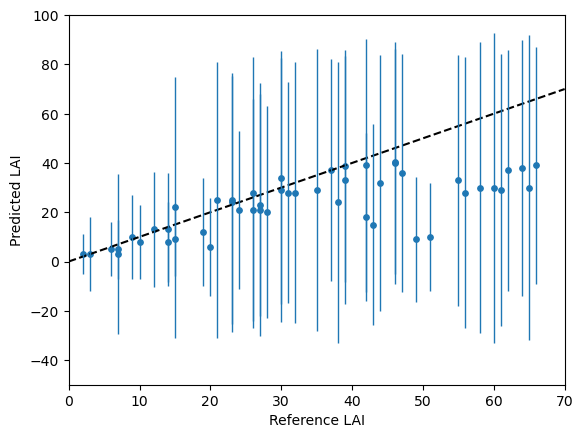

In [23]:
plt.scatter(y_test, y_hat, s=15)
plt.plot([0, 70], [0, 70], 'k--')
plt.errorbar(y_test, y_hat, yerr=np.subtract(upper, lower), ls='None', lw=1)
# plt.fill_between(
#     np.arange(len(upper)), lower, upper, alpha=0.2, color="r",
#     label="Pred. interval")
plt.xlabel("Reference LAI")
plt.ylabel("Predicted LAI")
plt.xlim([0, 70])
plt.ylim([-50, 100])
plt.show()

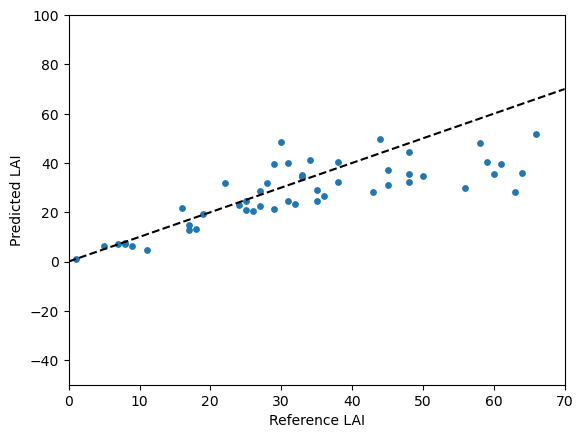

In [11]:
y_hat = rf.predict(X_test)
plt.scatter(y_test, y_hat, s=15)
plt.plot([0, 70], [0, 70], 'k--')
plt.xlabel("Reference LAI")
plt.ylabel("Predicted LAI")
plt.xlim([0, 70])
plt.ylim([-50, 100])
plt.show()

In [ ]:
print(upper[0])

In [ ]:
print(lower[0])

In [ ]:
print(y_true_all[0])

## forestci

In [ ]:
# retreive mpg data from machine learning library
dfcal = calbiomeDictLAI[1]['DF'].sample(50000)

regressors = ['red','NIR','cosSZA','cosVZA','cosSA']
response = 'LAI'
# separate mpg data into predictors and outcome variable
X_train = dfcal[regressors]
y_train = dfcal[response]

# split mpg data into training and test set
# mpg_X_train, mpg_X_test, mpg_y_train, mpg_y_test = xval.train_test_split(
#     mpg_X,
#     mpg_y,
#     test_size=0.25,
#     random_state=42)

# Create RandomForestRegressor
forest = RandomForestRegressor(n_estimators=10,min_samples_leaf=10,max_features=5,bootstrap=True,random_state=0,verbose=0,n_jobs=-1,max_leaf_nodes=10000)
forest.fit(X_train ,np.array(y_train).ravel())


In [ ]:
dfval = valbiomeDictLAI[1]['DF'].sample(50)
X_test = dfval[regressors]
y_test = dfval[response]

y_hat = forest.predict(X_test)

# Plot predicted MPG without error bars
plt.scatter(y_test, y_hat)
plt.plot([0, 70], [0, 70], 'k--')
plt.xlabel('Reference LAI')
plt.ylabel('Predicted LAI')
plt.show()

# Calculate the variance
V_IJ_unbiased = fci.random_forest_error(forest, X_train, X_test)

# Plot error bars for predicted MPG using unbiased variance
plt.errorbar(y_test, y_hat, yerr=np.sqrt(V_IJ_unbiased), fmt='o')
plt.plot([0, 70], [0, 70], 'k--')
plt.xlabel('Reference LAI')
plt.ylabel('Predicted LAI')
plt.show()

In [ ]:
V_IJ_unbiased

In [ ]:
# retreive mpg data from machine learning library
mpg_data = fetch_openml(data_id=196)

# separate mpg data into predictors and outcome variable
mpg_X = mpg_data["data"]
mpg_y = mpg_data["target"]

# remove rows where the data is nan
not_null_sel = np.where(mpg_X.isna().sum(axis=1).values == 0)
mpg_X = mpg_X.values[not_null_sel]
mpg_y = mpg_y.values[not_null_sel]

# split mpg data into training and test set
mpg_X_train, mpg_X_test, mpg_y_train, mpg_y_test = xval.train_test_split(
    mpg_X,
    mpg_y,
    test_size=0.25,
    random_state=42)

# Create RandomForestRegressor
n_trees = 2000
mpg_forest = RandomForestRegressor(n_estimators=n_trees, random_state=42)
mpg_forest.fit(mpg_X_train, mpg_y_train)
mpg_y_hat = mpg_forest.predict(mpg_X_test)

# Plot predicted MPG without error bars
plt.scatter(mpg_y_test, mpg_y_hat)
plt.plot([5, 45], [5, 45], 'k--')
plt.xlabel('Reported MPG')
plt.ylabel('Predicted MPG')
plt.show()

# Calculate the variance
mpg_V_IJ_unbiased = fci.random_forest_error(mpg_forest, mpg_X_train,
                                            mpg_X_test)

# Plot error bars for predicted MPG using unbiased variance
plt.errorbar(mpg_y_test, mpg_y_hat, yerr=np.sqrt(mpg_V_IJ_unbiased), fmt='o')
plt.plot([5, 45], [5, 45], 'k--')
plt.xlabel('Reported MPG')
plt.ylabel('Predicted MPG')
plt.show()

## method 3

In [24]:
def pred_ints(model, X, percentile=95):
    err_down = []
    err_up = []
    for x in range (len(X_test)):
        preds = []
        for pred in model.estimators_:
            preds.append(pred.predict(np.array(X.iloc[x]).reshape(1, -1)))
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))
    return err_down, err_up

In [28]:
err_down, err_up = pred_ints(rf, X_test, percentile=95)
 
truth = y_test
correct = 0.
for i, val in enumerate(truth):
    if err_down[i] <= val <= err_up[i]:
        correct += 1
print (correct/len(truth))

0.6


In [29]:
y_hat = rf.predict(X_test)

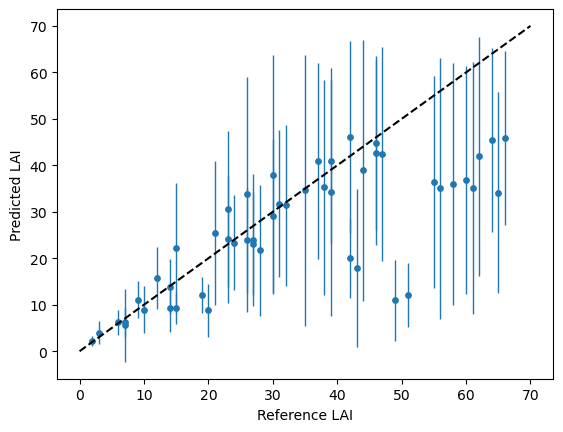

In [30]:
plt.errorbar(y_test, y_hat, yerr=np.subtract(err_up, err_down), ls='None', lw=1)
plt.scatter(y_test, y_hat, s=15)
plt.plot([0, 70], [0, 70], 'k--')
plt.xlabel('Reference LAI')
plt.ylabel('Predicted LAI')
plt.show()